In [2]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display
import pickle


zumi = Zumi()
#zumi.mpu.set_gyro_250_scale()
#zumi.mpu.set_gyro_2000_scale()
zumi.reset_gyro()
#zumi.mpu.calibrate_MPU()
zumi.MIN_I2C_DELAY = 0.01
zumi.MAX_USER_SPEED = 127




 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected


starting
done
samples number  387


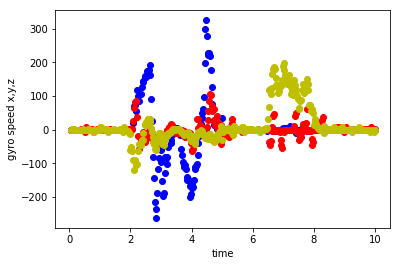

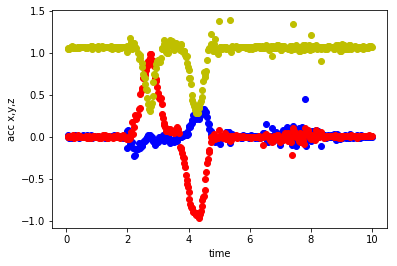

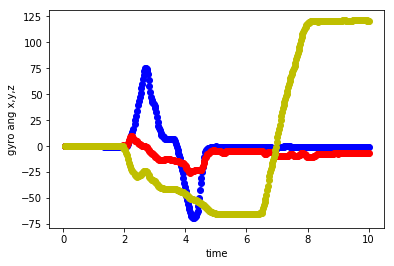

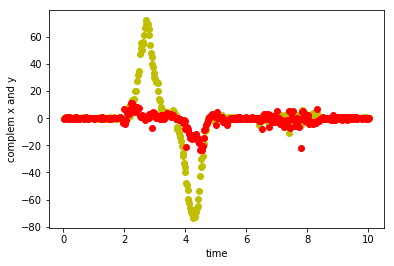

In [ ]:
zumi.reset_gyro()
#zumi.mpu.calibrate_MPU(100)


time_out = 10

speed = 10

time_passed = 0
init_time = time.time()
sensor_list = []
#[202, 90, 188, 14, 193, 229, 165, 96, 0, 0]
#0-5 ir sensors
#6 battery
#7 vcc rail
#8 version
#9 empty

#10 time elapsed
#11-13 acc: x,y,z

#10-12+4 ang_velocity: x,y,z
#13-15+4 angle: x,y,z 
#16-17+4 tilt x,y, 
#18-19+4 complem: x,y 
#20-22+4 rotation: x,y,z

print("starting")

while(time_passed <= time_out):
 
    zumi.update_angles()
    #zumi.go_straight(127,0)
    #zumi.control_motors(speed,-speed)
    arduino_readings = zumi.get_all_arduino_data()
    time_passed = time.time()-init_time
    arduino_readings.append(time_passed)
    sensor_list.append(arduino_readings+zumi.mpu_list+zumi.angle_list)
 
    
# while(time_passed <= time_out+4):
 
#     zumi.update_angles()
#     #zumi.go_straight(127,0)
#     #zumi.control_motors(speed,speed)
#     arduino_readings = zumi.get_all_arduino_data()
#     time_passed = time.time()-init_time
#     arduino_readings.append(time_passed)
#     sensor_list.append(arduino_readings+zumi.mpu_list+zumi.angle_list)
 
   
file = open("test.data", "wb")
pickle.dump(my_list,file)
file.close()    
    
zumi.stop()

print("done")
time_list = []

output_listx = []
output_listy = []
output_listz = []
output_list1 = []
output_list2 = []
output_list3 = []
output_list4 = []
output_list5 = []
output_list6 = []
output_list7 = []
output_list8 = []
output_list9 = []
output_list10 = []
output_list11 = []
output_list12 = []
output_list13 = []

for readings in sensor_list:
    time_list.append(readings[6+4])
    
    output_listx.append(readings[10+4])
    output_listy.append(readings[11+4])
    output_listz.append(readings[12+4])
    
    #7-9 acc: x,y,z
    output_list1.append(readings[7+4])
    output_list2.append(readings[8+4]) 
    output_list3.append(readings[9+4])
    
    #13-15 angle: x,y,z 
    output_list4.append(readings[13+4])
    output_list5.append(readings[14+4]) 
    output_list6.append(readings[15+4])
    
    output_list7.append(readings[16+4]) 
    output_list8.append(readings[17+4])
    
    #13-15 : rotation x,y,z 
    output_list9.append(readings[20+4])
    output_list10.append(readings[21+4]) 
    output_list11.append(readings[22+4])
    
    #batt and vcc not formatted properly
    output_list12.append(readings[6]) 
    output_list13.append(readings[7])

print("samples number ",len(time_list))

plt.plot(time_list,output_listx,'bo',time_list,output_listy,'ro',time_list,output_listz,'yo')
plt.ylabel('gyro speed x,y,z')
plt.xlabel('time')
plt.show()

plt.plot(time_list,output_list1,'bo',time_list,output_list2,'ro',time_list,output_list3,'yo')
plt.ylabel('acc x,y,z')
plt.xlabel('time')
plt.show()
  
plt.plot(time_list,output_list4,'bo',time_list,output_list5,'ro',time_list,output_list6,'yo')
plt.ylabel('gyro ang x,y,z')
plt.xlabel('time')
plt.show()

plt.plot(time_list,output_list7,'yo',time_list,output_list8,'ro')
plt.ylabel('complem x and y')
plt.xlabel('time')
plt.show()

plt.plot(time_list,output_list9,'bo',time_list,output_list10,'ro',time_list,output_list11,'go')
plt.ylabel('rot x,y,z')
plt.xlabel('time')
plt.show()


plt.plot(time_list,output_list12,'yo',time_list,output_list13,'ro')
plt.ylabel('batt and vcc')
plt.xlabel('time')
plt.show()